In [1]:
import graphviz as gv
from graphviz import Digraph

### Graphviz

In [21]:
def draw_min_heap_array(heap):
    dot = Digraph()
    
    def traverse(index):
        if index < len(heap.heap):
            dot.node(str(heap.heap[index]), str(heap.heap[index]))
            
            left_child = 2 * index + 1
            right_child = 2 * index + 2
            
            if left_child < len(heap.heap):
                dot.edge(str(heap.heap[index]), str(heap.heap[left_child]), label="L", style="dashed")
                traverse(left_child)
            
            if right_child < len(heap.heap):
                dot.edge(str(heap.heap[index]), str(heap.heap[right_child]), label="R", style="solid")
                traverse(right_child)
    
    traverse(0)
    return dot


##  Binary tree : AVL, Splay, ..?
def draw_binary_tree(root):
    dot = Digraph()
    
    def traverse(node):
        if node is None:
            return

        dot.node(str(node.key), str(node.key))
        
        if node.left is not None:
            dot.edge(str(node.key), str(node.left.key), label="L", style="dashed")
            traverse(node.left)
        
        if node.right is not None:
            dot.edge(str(node.key), str(node.right.key), label="R", style="solid")
            traverse(node.right)
    
    traverse(root)
    return dot

## other tree ?
#...

# Table des matières <a class="anchor" id="menu"></a>
* [Tas Min](#tasmin)
* [File Binomiale](#filebino)
* [Arbre Binaire de Recherche (ABR)](#abr)
* [Arbre 2-3-4](#arbre234)
* [Arbre-B](#arbreb)
* [Arbre AVL](#avl)
* [Arbre Auto-adaptatif (Splay-tree)](#splaytree)
* [Arbre Digital (DST)](#dst)
* [Arbre Lexicographique](#lexico)
* [R-Trie](#rtrie)
* [Trie Hybride](#triehybr)

___
## Tas Min <a class="anchor" id="tasmin"></a>                                                                                                                                  
#### [Retour](#menu) 



In [7]:

class MinHeapArray:
    def __init__(self):
        self.heap = [] # list of Uint128

    # Helper functions
    def _isHeap(self) -> bool: # check if the heap is a min heap
        n = len(self.heap)
        for i in range(0, n//2):
            left = 2*i + 1
            right = 2*i + 2
            if left < n and self.heap[left].inf(self.heap[i]):
                return False
            if right < n and self.heap[right].inf(self.heap[i]):
                return False
        return True
    
    def _parent(self, i: int) -> int:  # return parent's index
        # the floor division // rounds the result down to the nearest whole number
        return (i-1)//2

    # moves down the key at index i until it satisfies the heap property
    def _minHeapify(self, i: int) -> None:  
        smallest = i
        left = 2 * i + 1
        right = 2 * i + 2
        if left < len(self.heap) and self.heap[left]< self.heap[smallest]:
            smallest = left
        if right < len(self.heap) and self.heap[right]< self.heap[smallest]:
            smallest = right
        if smallest != i:
            self.heap[i], self.heap[smallest] = (self.heap[smallest], self.heap[i])
            self._minHeapify(smallest)

    # Ajout
    def insertKey(self, key) -> None:
        self.heap.append(key)  # add the new key
        i = len(self.heap) - 1
        # moves it up (swap with parent) until it satisfies the heap property
        while (i != 0) and self.heap[i]< self.heap[self._parent(i)]:
            self.heap[i], self.heap[self._parent(i)] = (
                self.heap[self._parent(i)], self.heap[i])
            i = self._parent(i)

    # AjoutIteratifs
    def insertKeyList(self, list: list) -> None:
        for key in list:
            self.insertKey(key)

    # SupprMin
    def extractMin(self):
        if self.heap[0] is None:
            return None
        self.heap[0], self.heap[-1] = self.heap[-1], self.heap[0]
        root = self.heap.pop()
        self._minHeapify(0)
        return root

    # Construction
    def createMinHeap(self, list: list) -> None:
        self.heap = list
        n = len(self.heap)
        # opti = loop half : nodes, not leaves. second half contains leaves(=node without children)
        for i in range(n//2, -1, -1):
            self._minHeapify(i)

    # Union
    def union(heap1: 'MinHeapArray', heap2: 'MinHeapArray') -> 'MinHeapArray':
        newHeap = MinHeapArray()
        data = heap1.heap + heap2.heap
        newHeap.createMinHeap(data)
        return newHeap

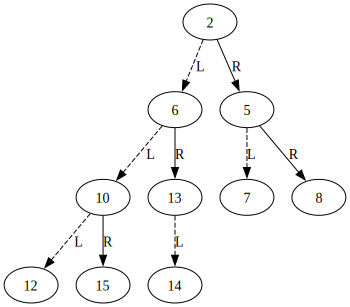

In [8]:
#exemple du cours
min_heap = MinHeapArray()
min_heap.insertKeyList([2 , 6 , 5 , 10 , 13 , 7 , 8 , 12 , 15 , 14])
dot = draw_min_heap_array(min_heap)
dot

[2, 4, 5, 10, 6, 7, 8, 12, 15, 14, 13]


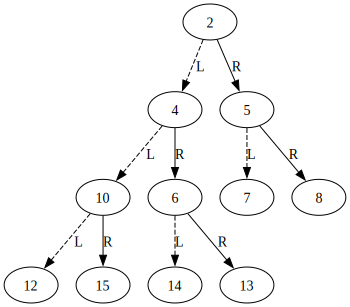

In [9]:
min_heap.insertKey(4)
print(min_heap.heap)
dot = draw_min_heap_array(min_heap)
dot

[5, 6, 7, 10, 13, 14, 8, 12, 15]


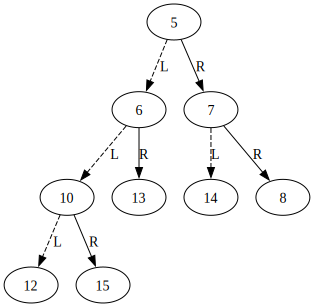

In [11]:
#exemple du cours
min_heap = MinHeapArray()
min_heap.insertKeyList([2 , 6 , 5 , 10 , 13 , 7 , 8 , 12 , 15 , 14])
min_heap.extractMin()
print(min_heap.heap)
dot = draw_min_heap_array(min_heap)
dot

## File Binomiale <a class="anchor" id="filebino"></a>

In [20]:
from collections import deque

class BinomialTree:
    def __init__(self, key = None):
        self.key = key
        self.parent = None
        self.children = deque()
        self.degree = 0

    def isEmpty(self) -> bool:
        return self.key is None

    # Merge two trees of the same degree
    def mergeBT(self, tree: 'BinomialTree') -> 'BinomialTree':
        if (self.degree != tree.degree):
            raise ValueError("Trees must have the same degree to be merged")
        if self.key.inf(tree.key):
            self.children.appendleft(tree)
            tree.parent = self
            self.degree += 1
            return self
        else:
            tree.children.appendleft(self)
            self.parent = tree
            tree.degree += 1
            return tree

    # Remove the root of the tree and return the heap of the remaining trees
    def decapitate(self) -> 'BinomialHeap':
        heap = BinomialHeap()
        for child in self.children:
            child.parent = None
            heap.trees.append(child)
        return heap

    # Convert a tree to a heap
    def toHeap(self) -> 'BinomialHeap':
        heap = BinomialHeap()
        heap.trees = [self]
        return heap


class BinomialHeap:
    def __init__(self):
        self.trees = deque()  # list of BinomialTrees

    def isEmpty(self) -> bool:
        return self is None or len(self.trees) == 0

    # Return the tree with the minimum degree
    def minDeg(self) -> 'BinomialTree':
        minDeg = self.trees[0]
        for tree in self.trees:
            if tree.degree < minDeg.degree:
                minDeg = tree
        return minDeg

    # Remove the tree with the minimum degree from the heap
    def _remains(self) -> None:
        minDeg = self.minDeg()
        self.trees.remove(minDeg)
        return self
    # Add a tree to the heap

    def _addMin(self, tree: 'BinomialTree') -> 'BinomialHeap':
        # tree is assumed to have the minimum degree
        self.trees.append(tree)
        return self

    # Merge heap with another heap follwing pseudo codes in class
    def mergeHeap(self, heap: 'BinomialHeap') -> 'BinomialHeap':
        return BinomialHeap._merge(self, heap, BinomialTree())

    def _merge(heap1: 'BinomialHeap', heap2: 'BinomialHeap', tree: 'BinomialTree') -> 'BinomialHeap':
        if tree.isEmpty():
            if heap1.isEmpty():
                return heap2
            if heap2.isEmpty():
                return heap1

            tree1 = heap1.minDeg()
            tree2 = heap2.minDeg()

            if (tree1.degree < tree2.degree):
                return BinomialHeap._addMin(BinomialHeap.mergeHeap(heap1._remains(), heap2), tree1)
            if (tree2.degree < tree1.degree):
                return BinomialHeap._addMin(BinomialHeap.mergeHeap(heap1, heap2._remains()), tree2)
            if (tree1.degree == tree2.degree):
                return BinomialHeap._merge(heap1._remains(), heap2._remains(), BinomialTree.mergeBT(tree1, tree2))
        else:
            if (heap1.isEmpty()):
                return BinomialHeap.mergeHeap(heap2, tree.toHeap())
            if (heap2.isEmpty()):
                return BinomialHeap.mergeHeap(heap1, tree.toHeap())

            tree1 = heap1.minDeg()
            tree2 = heap2.minDeg()

            if (tree.degree < tree1.degree and tree.degree < tree2.degree):
                return BinomialHeap._addMin(BinomialHeap.mergeHeap(heap1, heap2), tree)
            if (tree.degree == tree1.degree and tree.degree == tree2.degree):
                return BinomialHeap._addMin(BinomialHeap._merge(heap1._remains(), heap2._remains(), BinomialTree.mergeBT(tree1, tree2)), tree)
            if (tree.degree == tree1.degree and tree.degree < tree2.degree):
                return BinomialHeap._merge(heap1._remains(), heap2, BinomialTree.mergeBT(tree1, tree))
            if (tree.degree == tree2.degree and tree.degree < tree1.degree):
                return BinomialHeap._merge(heap1, heap2._remains(), BinomialTree.mergeBT(tree2, tree))

    # Insert by merging current heap with a heap containing only the key
    def insertKey(self, key) -> None:
        result = BinomialHeap.mergeHeap(self, BinomialTree(key).toHeap())
        self.trees = result.trees

    # Construction of a heap from a list of keys
    def createBinomialHeap(self, list: list):
        for key in list:
            self.insertKey(key)

    def extractMin(self):
        if self.isEmpty():
            return None
        minTree = self.trees[0]
        for tree in self.trees:
            if tree.key.inf(minTree.key):
                minTree = tree
        self.trees.remove(minTree)
        if (len(self.trees) == 0):
            self.trees = minTree.decapitate().trees
        else:
            self.trees = BinomialHeap.mergeHeap(
                self, minTree.decapitate()).trees
        return minTree.key

## Arbre Binaire de Recherche (ABR) <a class="anchor" id="abr"></a>

In [22]:

class BSTNode:
    def __init__(self, key ) -> None:
        self.key = key
        self.left = None
        self.right = None


class BSTree:
    def __init__(self) -> None:
        self.root = None

    def isEmpty(self) -> bool:
        return self.root is None

    def search(self, key) -> bool:
        current = self.root

        while current:
            if key < current.key:
                current = current.left
            elif key == current.key:
                return True
            else:
                current = current.right
        return False

    def insert(self, key) -> bool:
        if self.isEmpty():
            self.root = BSTNode(key)
            return True
        else:
            current = self.root
            while True:
                if key < current.key:
                    if current.left is None:
                        current.left = BSTNode(key)
                        return True
                    else:
                        current = current.left
                elif key == current.key:
                    return False
                else:
                    if current.right is None:
                        current.right = BSTNode(key)
                        return True
                    else:
                        current = current.right

    def inorderTraversal(self) -> list[*]:
        result = []

        def inorder(node: BSTNode) -> None:
            if node:
                inorder(node.left)
                result.append(node.key)
                inorder(node.right)

        inorder(self.root)
        return result

    def balance(self) -> None:
        keys = self.inorderTraversal()
        self.root = None
        self._build_balanced(keys, 0, len(keys) - 1)

    def _build_balanced(self, keys: list[*], start: int, end: int) -> None:
        if start > end:
            return None

        mid = (start + end) // 2
        self.insert(keys[mid])
        self._build_balanced(keys, start, mid - 1)
        self._build_balanced(keys, mid + 1, end)


SyntaxError: expected ':' (2326147997.py, line 49)

## Arbre 2-3-4 <a class="anchor" id="arbre234"></a>

## Arbre-B <a class="anchor" id="arbreb"></a>

## Arbre AVL <a class="anchor" id="avl"></a>

In [ ]:
class AVLNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def __init__(self):
        self.root = None

    #AJOUT
    def insert_list(self, keys):
        for key in keys:
            self.insert(key)
    
    def insert(self, key):
        self.root = self._insert(self.root, key)

    def _insert(self, node, key):
        if node is None:
            return AVLNode(key)
        elif key == node.key:
            return node
        elif key < node.key:
            node.left = self._insert(node.left, key)
        else:
            node.right = self._insert(node.right, key)

        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))
        
        return self._balance(node, key)

    #SUPPRESSION
    def delete(self, key):
        self.root = self._delete(self.root, key)
    
    def _delete(self, node, key):
        if node is None:
            return node
        elif key < node.key:
            node.left = self._delete(node.left, key)
        elif key > node.key:
            node.right = self._delete(node.right, key)
        else:
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            
            min_node = self._get_min_node(node.right)
            node.key = min_node.key
            node.right = self._delete(node.right, min_node.key)
        
        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))
        
        return self._balance(node, key)
    
    #RECHERCHE
    def search(self, key):
        return self._search(self.root, key)
    
    def _search(self, node, key):
        if node is None:
            return False
        elif key < node.key:
            return self._search(node.left, key)
        elif key > node.key:
            return self._search(node.right, key)
        else:
            return True
    
    #FONCTIONS UTILES / PRIMITIVES
    def _get_height(self, node):
        if node is None:
            return 0
        return node.height
    def _get_min_node(self, node):
        if node is None or node.left is None:
            return node
        return self._get_min_node(node.left)
    
    def _get_balance(self, node):
        if node is None:
            return 0
        return self._get_height(node.left) - self._get_height(node.right)

    def _balance(self, node, key):
        balance = self._get_balance(node)

        if balance > 1:
            if key < node.left.key:
                return self._rotate_right(node)
            else:
                return self._rotate_left_right(node)
        elif balance < -1:
            if key > node.right.key:
                return self._rotate_left(node)
            else:
                return self._rotate_right_left(node)

        return node
    
    def _rotate_left(self, node):
        y = node.right
        T2 = y.left

        y.left = node
        node.right = T2

        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))
        y.height = 1 + max(self._get_height(y.left), self._get_height(y.right))

        return y

    def _rotate_right(self, node):
        y = node.left
        T3 = y.right

        y.right = node
        node.left = T3

        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))
        y.height = 1 + max(self._get_height(y.left), self._get_height(y.right))

        return y
    def _rotate_left_right(self, node):
        node.left = self._rotate_left(node.left)
        return self._rotate_right(node)
    
    def _rotate_right_left(self, node):
        node.right = self._rotate_right(node.right)
        return self._rotate_left(node)
    

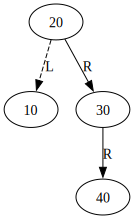

In [ ]:
# Create an instance of AVLTree
avl_tree = AVLTree()

# Insert nodes into the AVL tree
avl_tree.insert_list([10, 20, 30, 40])


# # Delete a node from the AVL tree
#avl_tree.delete(40)

# # # Search for a node in the AVL tree
#print(avl_tree.search(30))  # Output: True
#print(avl_tree.search(40))  # Output: False

# # Visualize the AVL tree
dot = draw_binary_tree(avl_tree.root)
dot
# dot.render('avl_tree_example', format='png', view=True)

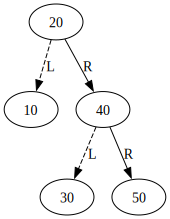

In [ ]:
avl_tree.insert(50)
dot = draw_binary_tree(avl_tree.root)
dot


## Arbre Auto-adaptatif (Splay-tree) <a class="anchor" id="splaytree"></a>

In [16]:
class SplayNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class SplayTree:
    def __init__(self):
        self.root = None
    #AJOUT
    def insert_list(self, key_list):
        for key in key_list:
            self.insert(key)

    def insert(self, key):
        self.root = self._insert(self.root, key)

    def _insert(self, node, key):
        if node is None:
            return SplayNode(key)
        elif key == node.key:
            return node
        elif key < node.key:
            node.left = self._insert(node.left, key)
        else:
            node.right = self._insert(node.right, key)
        
        return self._splay(node, key)
    #SUPPRESSION
    def delete(self, key):
        self.root = self._delete(self.root, key)
        
    def _delete(self, node, key):
        if node is None:
            return node
        elif key < node.key:
            node.left = self._delete(node.left, key)
        elif key > node.key:
            node.right = self._delete(node.right, key)
        else:
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            
            min_node = self._get_min_node(node.right)
            node.key = min_node.key
            node.right = self._delete(node.right, min_node.key)
        
        return node
    #RECHERCHE
    def search(self, key):
        self.root = self._search(self.root, key)
        return self.root is not None and self.root.key == key

    def _search(self, node, key):
        if node is None or node.key == key:
            return node
        elif key < node.key:
            if node.left is None:
                return node
            if key < node.left.key:
                node.left.left = self._search(node.left.left, key)
                node = self._rotate_right(node)
            elif key > node.left.key:
                node.left.right = self._search(node.left.right, key)
                if node.left.right is not None:
                    node.left = self._rotate_left(node.left)
            if node.left is not None:
                return self._rotate_right(node)
            else:
                return node
        else:
            if node.right is None:
                return node
            if key < node.right.key:
                node.right.left = self._search(node.right.left, key)
                if node.right.left is not None:
                    node.right = self._rotate_right(node.right)
            elif key > node.right.key:
                node.right.right = self._search(node.right.right, key)
                node = self._rotate_left(node)
            if node.right is not None:
                return self._rotate_left(node)
            else:
                return node
            
    #FONCTIONS UTILES / PRIMITIVES
    def _splay(self, node, key):
        if node is None or node.key == key:
            return node
        elif key < node.key:
            if node.left is None:
                return node
            if key < node.left.key:
                node.left.left = self._splay(node.left.left, key)
                node = self._rotate_right(node)
            elif key > node.left.key:
                node.left.right = self._splay(node.left.right, key)
                if node.left.right is not None:
                    node.left = self._rotate_left(node.left)
            if node.left is not None:
                return self._rotate_right(node)
            else:
                return node
        else:
            if node.right is None:
                return node
            if key < node.right.key:
                node.right.left = self._splay(node.right.left, key)
                if node.right.left is not None:
                    node.right = self._rotate_right(node.right)
            elif key > node.right.key:
                node.right.right = self._splay(node.right.right, key)
                node = self._rotate_left(node)
            if node.right is not None:
                return self._rotate_left(node)
            else:
                return node

    def _rotate_left(self, node):
        y = node.right
        node.right = y.left
        y.left = node
        return y

    def _rotate_right(self, node):
        x = node.left
        node.left = x.right
        x.right = node
        return x

    def _get_min_node(self, node):
        if node is None or node.left is None:
            return node
        return self._get_min_node(node.left)

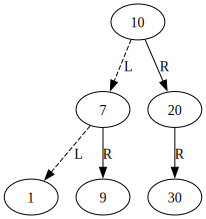

In [18]:
splay_tree = SplayTree()

splay_tree.insert_list([1,9,7,30,20,10])
dot = draw_binary_tree(splay_tree.root)
dot


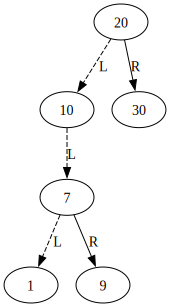

In [19]:
splay_tree.search(20)
dot = draw_binary_tree(splay_tree.root)
dot

## Arbre Digital (DST) <a class="anchor" id="dst"></a>

In [23]:
class ArbreBinaire:
    def __init__(self,cle):
        self.cle = cle
        self.gauche = None
        self.droite = None
        
class DST :
    def __init__(self, dic , c = None):
        self.dic = dic  # Exemple : dic = {'a':'01','b':'11','c':'00','d':'10'}
        if c is None :
            self.racine = None
        else :  #On suppose que c est un caractère et que tab est un tableau de couples (caractère, caractère binaire)
            self.racine = ArbreBinaire(c)
            

    def ArbreVide(self):
        return ArbreBinaire()

    def EstArbreVide(self):
        return self.racine is None
    
    def Racine(self):
        return self.racine.cle
    
    def SousArbreGauche(self):
        return self.racine.gauche
    
    def SousArbreDroit(self):
        return self.racine.droite
    
    def car(self, c , i):
        for k , v in self.dic.items():
            if k == c and len(v)-1 >= i:
                res= v[i]
                return int(res)
        #print("Erreur : caractère non trouvé")
        return None

    def DST_Ajout(self, c ): #c est un caractère  
        return self.DST_Ajout_rang(c , 0)
    
        
    def DST_Ajout_rang(self, c , i):
        new_node = ArbreBinaire(c)
        if self.EstArbreVide(): #Si l'arbre est vide
            self.racine = new_node  
        else : 
            if self.car(c,i) == 0 : #Si le code binaire du caractère à la position i est 0
                if self.racine.gauche is None:
                    self.racine.gauche = ArbreBinaire(c)   
                else:   #Si le fils gauche de la racine n'est pas vide
                    self.DST_AjoutRec(self.racine.gauche , c , i+1) 
            if self.car(c,i) == 1 : #Si le code binaire du caractère à la position i est 1
                if self.racine.droite is None:  
                    self.racine.droite = ArbreBinaire(c)
                else:   #Si le fils droit de la racine n'est pas vide
                    self.DST_AjoutRec(self.racine.droite , c , i+1)
            else:
                return self 

    
    def DST_AjoutRec(self , A , c , i):
        if c == A.cle:  #Si le caractère est déjà présent dans l'arbre
            return self
        if self.car(c,i) == 0 :    #Si le code binaire du caractère à la position i est 0
            if A.gauche is None:   
                A.gauche = ArbreBinaire(c)
            else:  
                self.DST_AjoutRec(A.gauche , c , i+1)
        else :  #Si le code binaire du caractère à la position i est 1
            if A.droite is None:  
                A.droite = ArbreBinaire(c)
            else:   
                self.DST_AjoutRec(A.droite , c , i+1)
        return A


    def DST_Recherche(self, c): #c est un caractère
        return self.DST_Recherche_rang( self.racine, c , 0)
    
    def DST_Recherche_rang(self, A,  c , i):    #A est un arbre binaire
        if A is None: 
            return False
        if c == A.cle:    
            return True
        if self.car(c,i) == 0 :  
            return self.DST_Recherche_rang(A.gauche , c , i+1)
        else :     
            return self.DST_Recherche_rang(A.droite , c , i+1)
        
        

    def DST_Suppression(self, c): #c est un caractère
        return self.DST_Suppression_rang(self.racine, c , 0)
    
    def DST_Suppression_rang(self, A , c , i): # CBinaire est un caractère binaire, exemple : '0101'
        if A is None:   #Si l'arbre est vide
            return None
        
        if c == A.cle:      #Si le caractère est trouvé, on verifie tous les cas
            if A.gauche is None and A.droite is None:
                return None
            if A.gauche is None:   
                return A.droite
            if A.droite is None:    
                return A.gauche
            else:   #Si le noeud a deux fils
                node = self.DST_node_min(A.droite)
                A.cle = node.cle   
                A.droite = self.DST_Suppression_rang(A.droite, node.cle , i+1)  
                return A
        if self.car(c,i) == 0 :  
            A.gauche = self.DST_Suppression_rang(A.gauche , c , i+1)
        else :     
            A.droite = self.DST_Suppression_rang(A.droite , c , i+1)
        return A

    def DST_node_min(self, A ):    #A est un arbre binaire
        cur = A  
        while (cur.gauche is not None): 
            cur = cur.gauche
        return cur
        

    def DST_Construction(self):
        for c in self.dic.keys():
            self.DST_Ajout(c) 
        return self


    def afficher_arbre(self , arbre, niveau=0):
        if arbre is not None:
            self.afficher_arbre(arbre.droite, niveau + 1)
            if niveau > 0:
                print('   ' * (niveau - 1) + '|--', end='')
            print(str(arbre.cle))
            self.afficher_arbre(arbre.gauche, niveau + 1)

## Arbre Lexicographique <a class="anchor" id="lexico"></a>

## R-Trie <a class="anchor" id="rtrie"></a>

## Trie Hybride <a class="anchor" id="triehybr"></a>